In [53]:
from vtl.Readfile import Readfile
from vtl.Photo import Photometry
from spec_id import Gauss_dist, Gen_spec
from astropy.table import Table
from astropy.io import fits
import astropy.units as u
import os
from astropy.cosmology import Planck13, z_at_value
from scipy.interpolate import interp1d, interp2d
from scipy.ndimage import interpolation
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.animation as animation

from mpl_toolkits.axes_grid.inset_locator import inset_axes
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
R = robjects.r
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
colors = [(0,i,i,i) for i in np.linspace(0,1,3)]
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)
pandas2ri.activate()

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### set home for files
hpath = os.environ['HOME'] + '/'

In [47]:
def Gen_2d_gauss(gridsize,mu,sig):
    grid_range = np.arange(gridsize)
    g=Gauss_dist(grid_range,mu,sig)
    grid = np.ones([gridsize,gridsize])

    for i in range(len(grid)):
        grid[i] *= g

    for i in range(len(grid)):
        grid.T[i] *= g

    return np.array(grid).astype(np.float32)

In [40]:
sp = Gen_spec('n21156',1.249)

grid /= (np.max(sp.beam.beam.direct) / np.max(grid))
sp.beam.beam.direct = grid



/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.7.0-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3449: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.7.0-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3454: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.7.0-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3455: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.7.0-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:545: RuntimeWarning: divide by zero encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/vestrada/mini

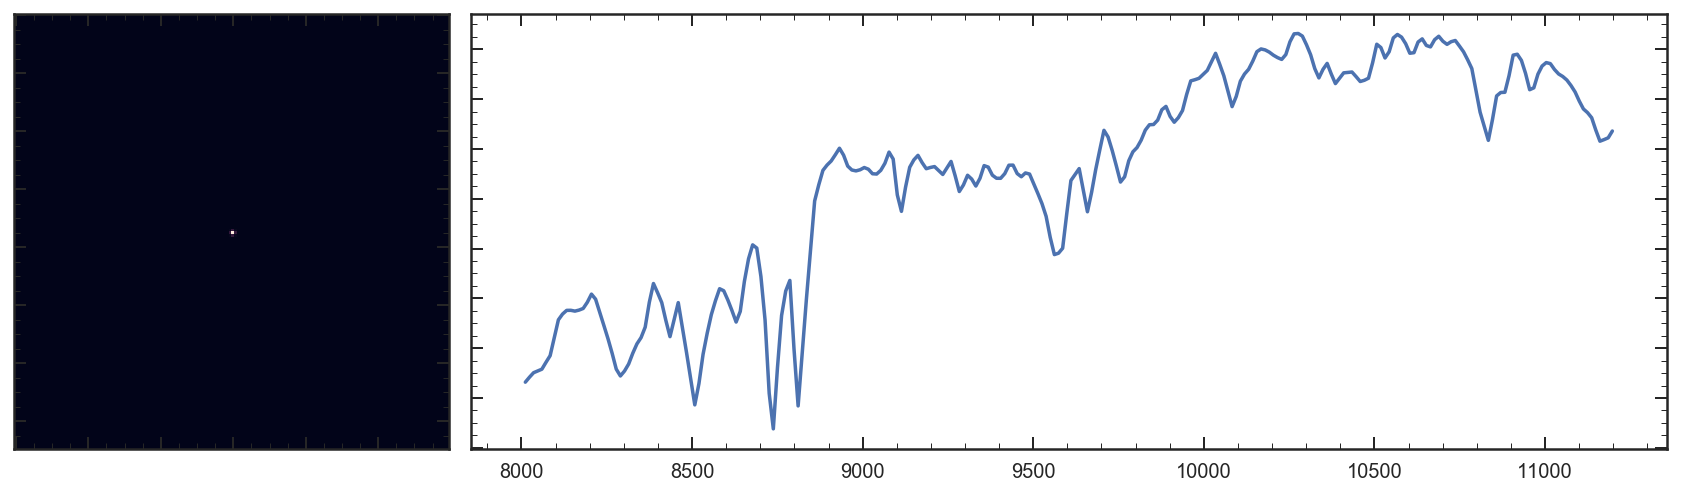

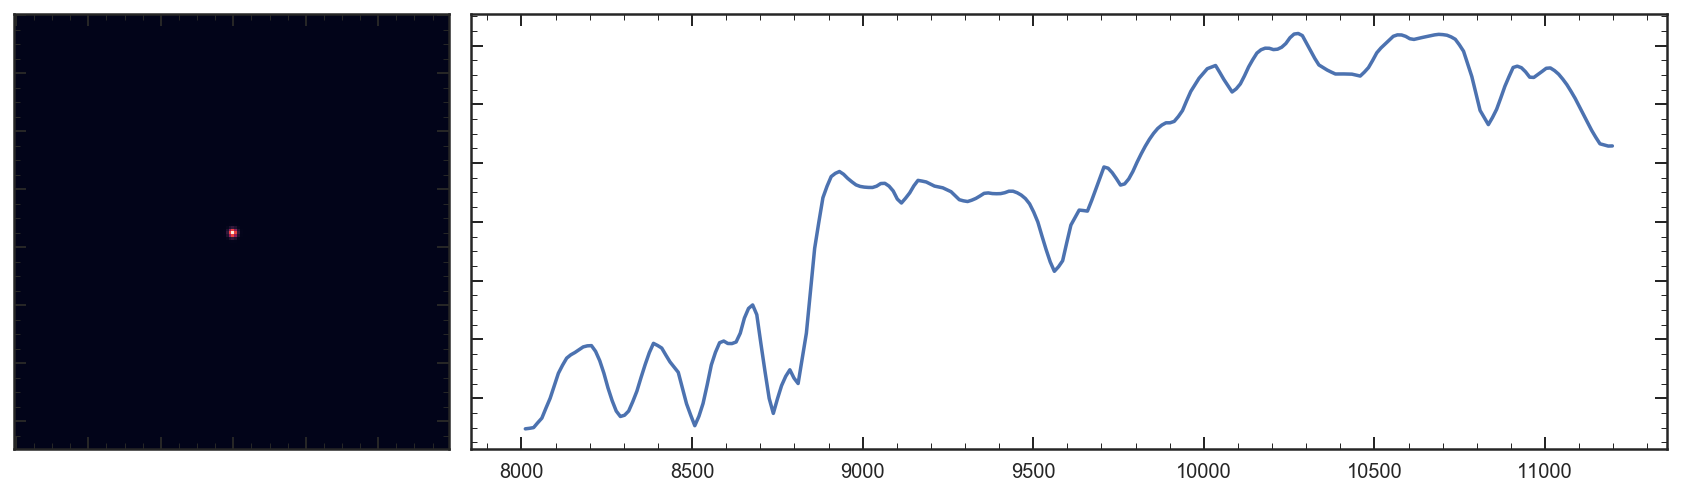

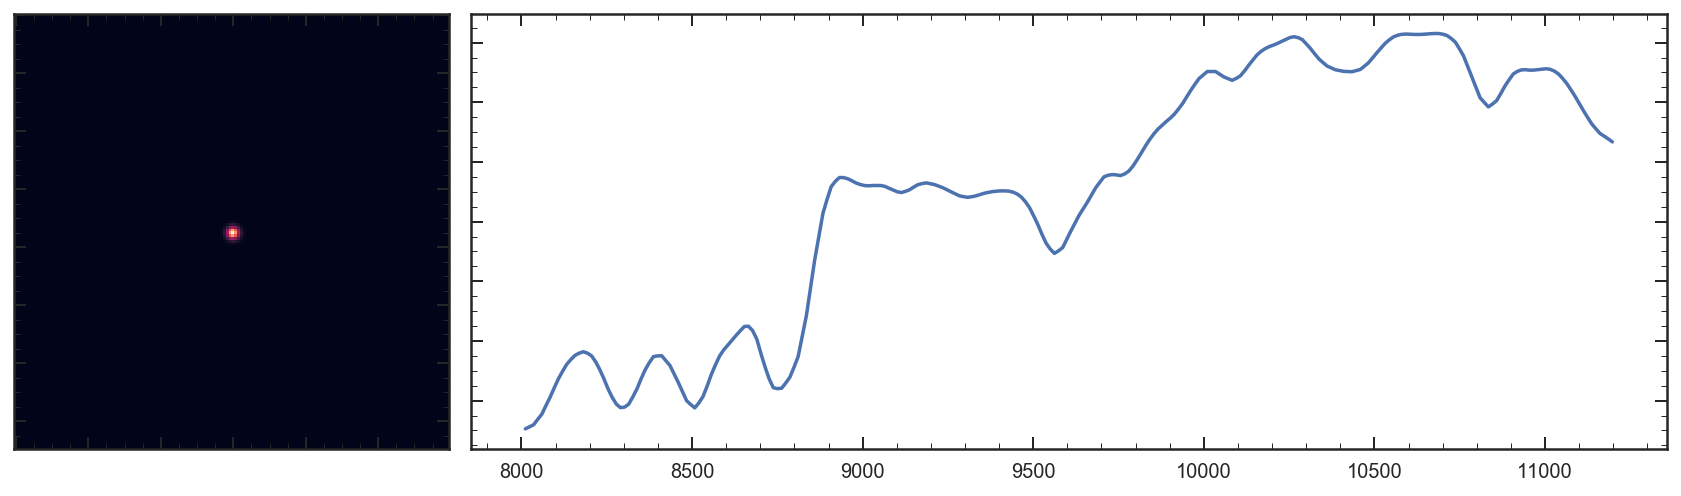

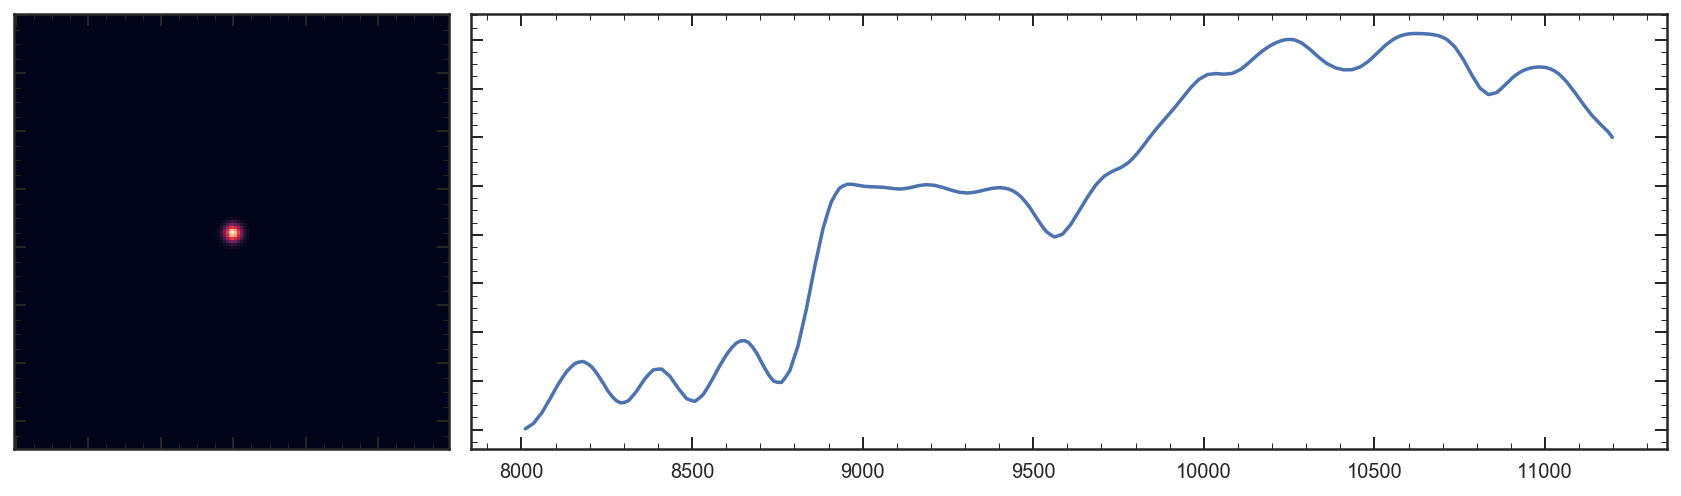

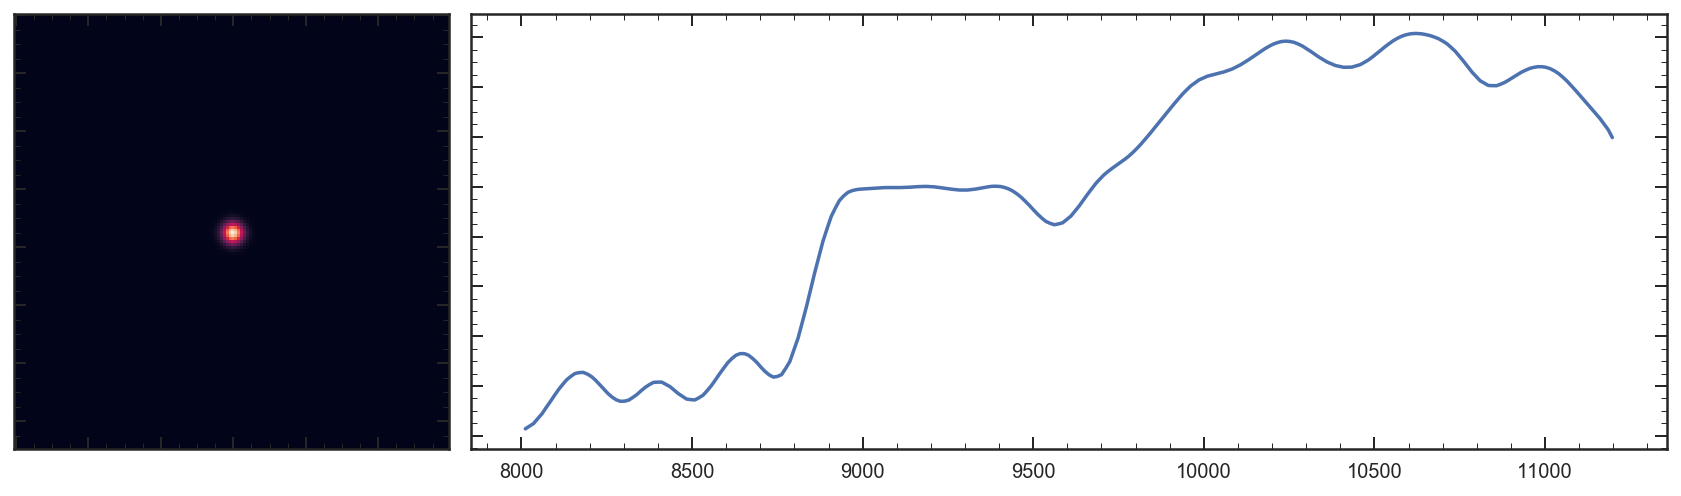

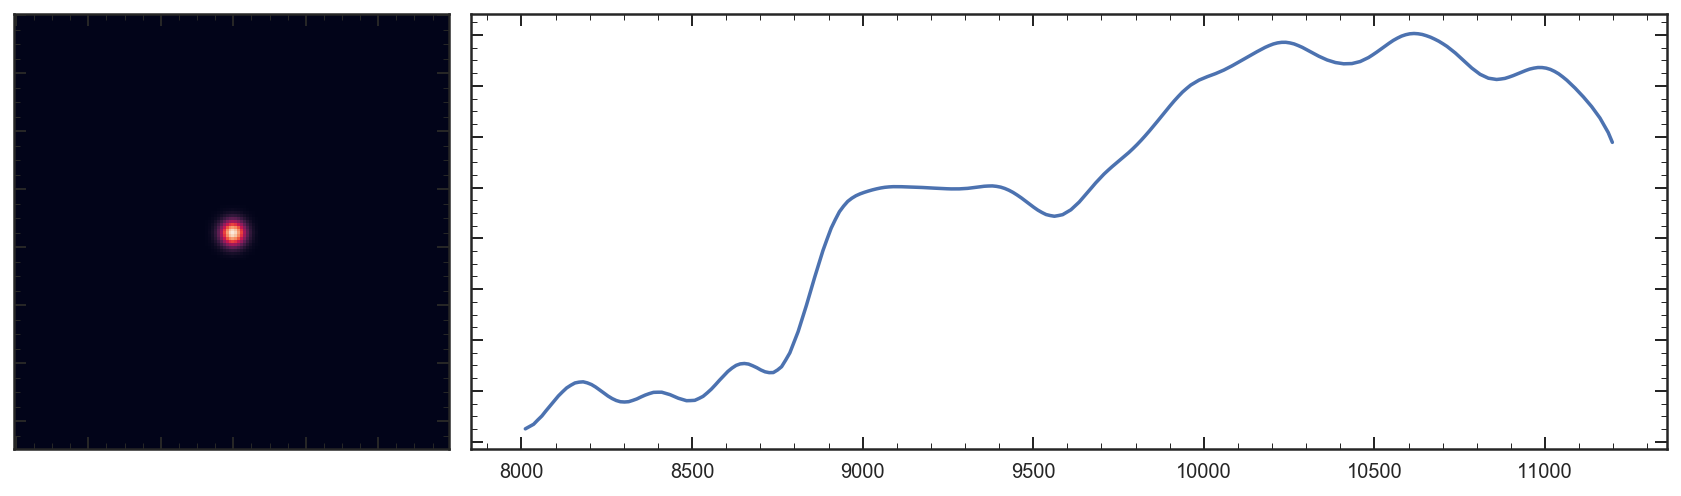

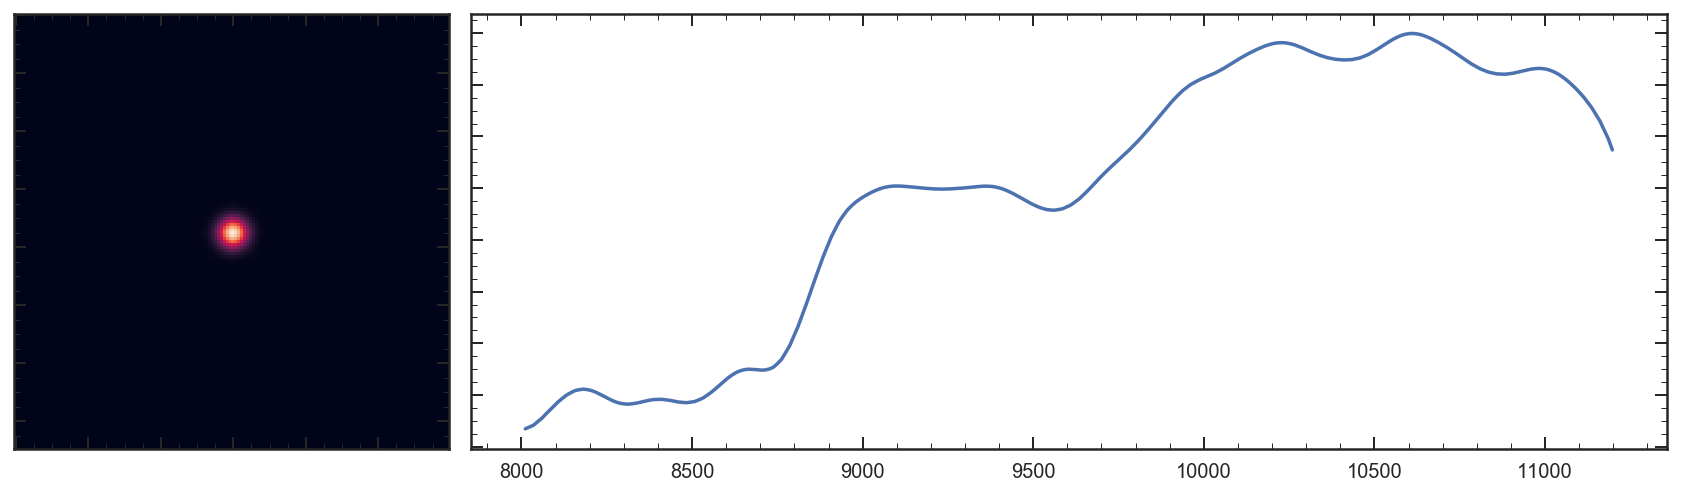

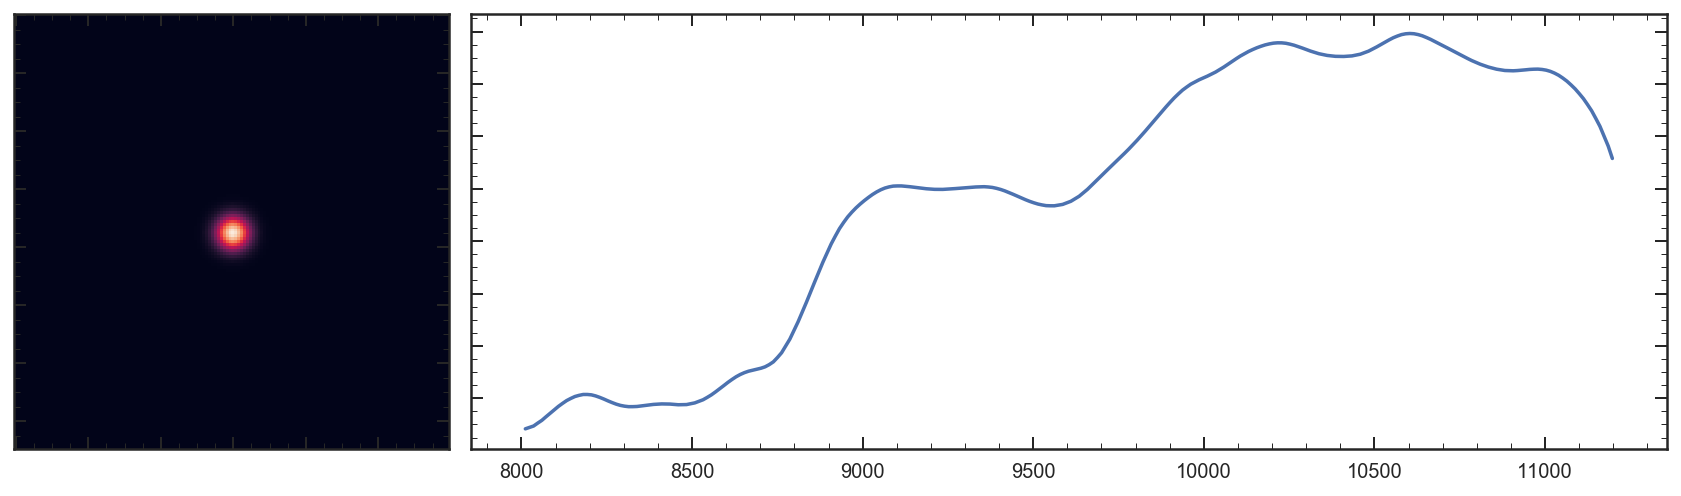

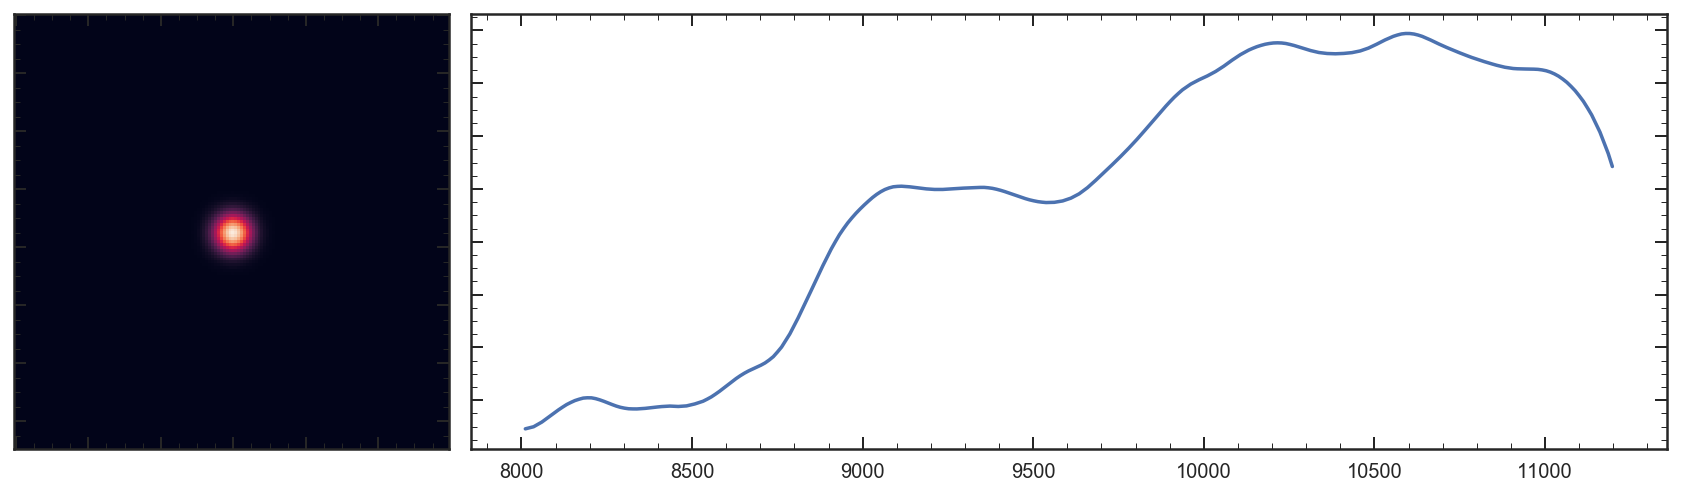

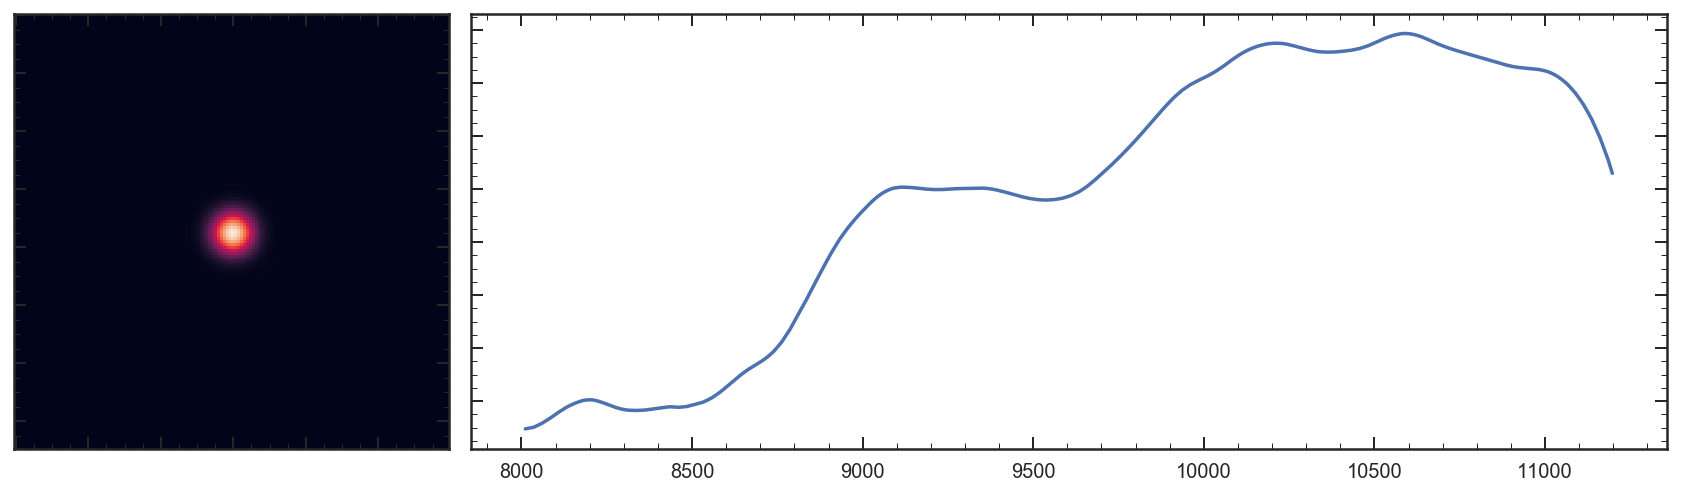

In [61]:
sigs = np.arange(.5,5.5,.5)

sp = Gen_spec('n21156',1.249)
mod = np.max(sp.beam.beam.direct)

for i in range(len(sigs)):
    grid = Gen_2d_gauss(150,75,sigs[i])
    grid /= (mod/ np.max(grid))
    sp.beam.beam.direct = grid
    
    gs = gridspec.GridSpec(1,2,width_ratios=[1,2.5],wspace=0)

    im = plt.figure(figsize=[15,4])
    plt.subplot(gs[0])
    plt.imshow(grid)
    plt.gca().tick_params(axis='y',labelleft='off')
    plt.gca().tick_params(axis='x',labelbottom='off')
    

    sp.Sim_spec(0.019,2.5,8.0)

    plt.subplot(gs[1])
    plt.plot(sp.gal_wv,sp.fl*1E18)
    plt.gca().tick_params(axis='y',labelleft='off')
    plt.savefig('../plots/morph_plots/morph_plot_{0}.png'.format(i))

In [25]:
grid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])